In [1]:
import pandas as pd

In [3]:
path = './Customer Churn Dataset.csv'
dataset = pd.read_csv(path)

In [57]:
# DATA UNDERSTANDING (EDA + HYPOTHESES)

In [4]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
dataset.shape

(7043, 21)

In [7]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# Quick check of shape and data types shows that the dataset has 
# ~7K customers, which represents a realistic mid-size business dataset.
# Mixed feature types (object, int64, float64) mirrors real production data.

# It is important to verify the dataset size and feature types to 
# assess feasibility and preprocessing needs before modeling

In [10]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# Column Labels

# Identifier -> customerID
# Customer Profile -> gender, SeniorCitizen, Partner, Dependents
# Contract -> tenure, Contract
# Service -> PhoneService, MultipleLines, InternetService, OnlineSecurity, 
#             OnlineBackup, DeviceProtection, TechSupport, StreamingTV, 
#             StreamingMovies
# Payment -> PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges
# Output/Target -> Churn

In [14]:
dataset['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [15]:
dataset['Churn'].value_counts(normalize = True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [16]:
# About 1 in 4 customers churn ('Yes' churn is ~26.5%)

# This becomes a moderately imbalanced classification problem, so 
# accuracy alone would be misleading. In other words, a naive model
# predicting 'No' would already have ~73% accuracy 

In [17]:
churn_rate = (dataset['Churn'] == 'Yes').mean()
churn_rate

np.float64(0.2653698707936959)

In [35]:
# churn_rate sets the baseline business risk
# Any retention strategy must beat this

# churn_rate defines a baseline metric to judge whether the model
# adds real business value or not

In [19]:
dataset['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [36]:
# Based on the describe() output, 
# 25% customers leave within first 9 months -> Onboarding and expectation gap problem
# Mean > Median -> Right skewed -> Few long tenure customers pull the average up 

# Churn is most likely early in the customer lifecycle, stabilizing
# significantly after ~2-3 years

In [20]:
# Customers churn early
# Tenure shows strong right skew, indicating churn risk is concentrated
# in early customer life 

In [21]:
# Churn vs Tenure
dataset.groupby('Churn')['tenure'].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [22]:
# Churners leave much earlier, so early retention programs are high ROI

In [23]:
# Churn vs Monthly Charges
dataset.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [24]:
# Higher prices -> Higher churn risk 
# Monthly Charges is a key churn driver, especially for newer customers (low tenure -> high churn)

In [37]:
# Churn vs Contract Type
dataset.groupby('Contract')['Churn'].value_counts(normalize = True)

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: proportion, dtype: float64

In [38]:
# Contract committment locks in retention

In [30]:
# Churn vs PaymentMethod

In [39]:
dataset.groupby('PaymentMethod')['Churn'].value_counts(normalize = True)

PaymentMethod              Churn
Bank transfer (automatic)  No       0.832902
                           Yes      0.167098
Credit card (automatic)    No       0.847569
                           Yes      0.152431
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.808933
                           Yes      0.191067
Name: proportion, dtype: float64

In [40]:
# Electronic check has highest churn, while auto pay methods have 
# comparatively lower churn rates.
# Payment friction correlates with dissatisfaction. 
# Incentivizing auto-pay methods would lead to higher ROI

# Operational friction can indirectly increase churn 

In [33]:
(dataset['TotalCharges'].str.strip() == '').sum()

np.int64(11)

In [34]:
# New customers (with tenure = 0) would have had no billing yet, 
# so TotalCharges does not randomly have missing values
# Since TotalCharges = tenure * MonthlyCharges, there is no data 
# leakage here, because it aggregates past values

In [41]:
# DATA UNDERSTANDING AND INITIAL HYPOTHESES
# Churn Rate = ~26.5%
# Strong tenure dependency
# High monthly charges drive away customers
# Contract committment reduces churn rate
# TotalCharges has ~11 missing values due to zero-tenure customers 
# Moderate class imbalance (No churn has ~73.5%)

In [44]:
dataset.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [45]:
# FEATURE ENGINEERING

In [46]:
# Since customerID is a pure identifier and provides no 
# behavioural signal, it is better to drop it as it can bias tree models
dataset = dataset.drop(columns = ['customerID'])

In [47]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors = 'coerce')
dataset['TotalCharges'].isna().sum()

np.int64(11)

In [48]:
dataset['TotalCharges'] = dataset['TotalCharges'].fillna(0)

In [49]:
# Tenure binning to capture non linear churn risk across customer
# lifecycle stages (linear models struggle with raw tenure as early 
# churn is not equal to late churn)
dataset['tenure_group'] = pd.cut(
            dataset['tenure'], 
            bins = [-1, 6, 12, 24, 48, 72], 
            labels = ['0-6', '7-12', '13-24', '25-48', '49-72']
        )

In [50]:
# Price Sensitivity feature (or Price Pressure indicator)
# Relative pricing matters more than absolute, so this feature will
# identify cost-sensitive churners
dataset['high_monthly_charge'] = (dataset['MonthlyCharges'] > dataset['MonthlyCharges'].median()).astype(int)

In [51]:
# Contract Committment Encoding -> Ordinal Encoding
# Ordinal Encoding reflects increasing committment (hence preferred over one-hot encoding)
contract_map = {
    'Month-to-month': 0, 
    'One year': 1, 
    'Two year': 2
}

dataset['contract_committment'] = dataset['Contract'].map(contract_map)

In [56]:
# Binary Service Aggregation (reduces noise)
# Instead of 9 service columns, we add 1 signal to reduce stickiness
# More services -> more switching cost
# Less services -> easier to leave (stickiness feature)

service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
               'TechSupport', 'StreamingTV', 'StreamingMovies']

dataset['num_services'] = (dataset[service_cols] == 'Yes').sum(axis = 1)

In [53]:
# Payment friction feature 
# Lower friction -> lower churn
dataset['auto_payment'] = dataset['PaymentMethod'].isin(['Bank transfer (automatic)', 'Credit card (automatic)']).astype(int)

In [54]:
# Encode target variable
dataset['Churn'] = (dataset['Churn'] == 'Yes').astype(int)

In [55]:
# FEATURE ENGINEERING SUMMARY 

# Includes
# 1. Tenure lifecycle bins 
# 2. Pricing pressure indicator 
# 3. Contract committment encoding
# 4. Service aggregation
# 5. Payment friction feature
# 6. Leakage-safe handling of TotalCharges

In [58]:
# BASELINE MODEL

In [59]:
# Feature Engineering is data understanding + transformation, and 
# modelling decisions must be evaluated on unseen data. So, 
# train-validation split is done after feature engineering, and not before

In [64]:
import sys
sys.executable

'/opt/homebrew/opt/python@3.11/bin/python3.11'

In [65]:
!{sys.executable} -m pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 31.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 37.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [80]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns = ['Churn'])
y = dataset['Churn']

# random_state fixes the random seed, and makes split reproducible
# Without it, every run gives different train-validation sets, making
# metrics fluctuate, hence confusing debugging

# stratify = y ensures churn rate in train = churn rate in validation
# Without stratify, if train set has 30% churn, while validation set 
# has 20% churn, the model evaluation becomes misleading and churn 
# becomes imbalanced 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [67]:
y_train.mean()

np.float64(0.2653532126375577)

In [68]:
y_val.mean()

np.float64(0.2654364797728886)

In [81]:
# Separate numeric and categorical features
# This prevents leakage and keeps preprocessing reproducible 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_cols = X.select_dtypes(include = ['int64', 'float64']).columns

# 'category' type is included in case we convert columns later
# (pandas supports category type)
# This makes the pipeline robust, future proof, and production-ready
categorical_cols = X.select_dtypes(include = ['object', 'category']).columns

In [87]:
# Column 'Contract' has these values -> Month-to-month, One year, and Two year
# On one hot encoding, we get the following table
# Month-to-month     One year     Two year
# 1                  0            0
# 0                  1            0
# 0                  0            1

# For every row, month-to-month + one year + two year = 1
# So, one column can be perfectly calculated from the others 
# This means that the model is given the same information twice. This is
# called perfect multicollinearity 

# Since logistic regression tries to learn coefficients like 
# churn = b0 + b1 * (month-to-month) + b2 * (one year) + b3 * (two year)
# But since month-to-month = 1 - (one year + two year), there are infinite
# solutions for b1, b2, and b3. This makes the model unstable, coefficients
# stop meaning anything, and the model may not converge cleanly 

# drop = 'first' parameter keeps all categories except one 
# Say, we drop month-to-month. Now encoding looks like 
# One year     Two year
# 0            0               <- Month-to-month
# 1            0               <- One year
# 0            1               <- Two year 
# Now, there is no redundancy. This fixes the problem because columns are
# independent, model has one unique solution, and coefficients become
# meaningful. Most importanty, all values are interpreted relative
# to the dropped category. 
# Lets say, coefficient(one year) = -0.8 and coefficient(two year) = -1.5
# This means, compared to month-to-month, one year contracts reduce
# churn risk, while two year contracts reduce churn even more. Hence
# month-to-month becomes the baseline. Without drop = 'first', we cannot 
# say this cleanly. 
# If we dropped another column, that would become the baseline or the 
# reference point 
# In short, drop = 'first' removes redundant information so the model
# learn differences relative to a baseline category instead of absolute
# categories 

# If a categorical column has N values, one hot encoding gives N columns, 
# while we only need N-1. The missing one is the baseline. 

In [88]:
# Baseline Model -> Logistic Regression 
# Logistic Regression is used because it is interpretable, 
# has strong baseline, and coefficients give the direction of effect 

from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_cols), 
        ('cat', OneHotEncoder(drop = 'first', handle_unknown = 'ignore'), categorical_cols)
    ]
)

# lbfgs optimisation algorithm is used as it is stable, fast, and 
# works well with multi class and regularization

# Since the dataset has 73.5% non-churn and only 26.5% churn, 
# if we don't handle this, the model learns that if it predicts "No Churn"
# it'll be right most of the time. So, class_weight tells the model 
# that mistakes on minority class (churn) are more costly. So, during 
# training, missing a churner is penalized more, and the model is 
# pushed to catch churners 

logistic_regression = LogisticRegression(
    max_iter = 1000, 
    class_weight = 'balanced', 
    solver = 'lbfgs'
)

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor), 
    ('model', logistic_regression)
])

In [95]:
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

In [85]:
# Baseline Evaluation

y_pred = pipeline.predict(X_val)

# predict_proba gives [P(class = 0), P(class = 1)]
# [:, 1] means that we are interested in the probability of churn 
# (or P(y = 'Yes, churned') or P(y = 1))
y_proba = pipeline.predict_proba(X_val)[:, 1]

In [76]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix
)

print("Accuracy: ", accuracy_score(y_val, y_pred))
print("Precision: ", precision_score(y_val, y_pred))
print("Recall: ", recall_score(y_val, y_pred))
print("F1: ", f1_score(y_val, y_pred))
print("ROC AUC: ", roc_auc_score(y_val, y_proba))

Accuracy:  0.7388218594748048
Precision:  0.5050505050505051
Recall:  0.8021390374331551
F1:  0.6198347107438017
ROC AUC:  0.844899119067917


In [86]:
# Confusion Matrix, by convention is 
# [[TrueNegative    FalsePositive]
# [FalseNegative   TruePositive]]
# or 
#                PredictedNo     PredictedYes
# ActualNo       741             294
# ActualYes      74              300

# So based on the output, we see 741 loyal customers were correctly
# identified, but 294 loyal customers were wrongly targetted. 
# 300 churners were correctly caught, but 74 churners were missed 
# (big loss)

confusion_matrix(y_val, y_pred)

array([[741, 294],
       [ 74, 300]])

In [161]:
# Accuracy = How often am I correct overall
# Accuracy = (TruePositive + TrueNegative) / (TruePositive + TrueNegative + FalsePositive + FalseNegative)
# Out of all customers, how many did I classify correctly 
# Churn is usually imbalanced (say, only 20% churn)
# Example, 80% did not churn. If the model predicts "No churn" for 
# everyone, the accuracy still is 80%, but the model is useless because
# it misses all churners. So, accuracy is misleading for imbalanced 
# problems. Should be used only when classes are balanced and the cost of 
# errors is symmetric 


# Precision = When I predict churn, how often am I right?
# Precision = TruePositive / (TruePositive + FalsePositive)
# Among all customers we predicted as "will churn", how many actually
# churned? High precision = few false alarms. Retention team contacts
# only customers who really are risky. Precision matters when false
# positives are expensive. 
# Example, giving discounts/calling customers costs money, and we don't
# want to waste money/efforts on customers who wouldn't churn 
# So, high precision -> effective targetting; low precision -> many 
# wasted retention offers


# Recall(Sensitivity) = How many real churners did we catch 
# Recall = TruePositive / (TruePositive + FalseNegative)
# Out of all customers who actualy churned, how many did the model detect
# High Recall = We catch most churners
# Low Recall = many customers leave silently 
# Recall matters when missing a positive is very costly 


# Precision vs Recall tradeoff -> Both cannot be maximized at the same time
# Lower threshold -> predict more churn -> recall increases (catch most
# churners) -> precision decreases (more false alarms)


# F1 Score = Single score balancing precision and recall 
# F1 = 2 * (Precision * Recall) / (Precision + Recall)
# F1 = Harmonic Mean of Precision and Recall
# It tells if the model is doing well on both catching churners and 
# not raising too many false alarms
# If either precision or recall is low, F1 is low, and becomes high only
# when both are reasonably high 
# Even though F1 gives a balanced performance measure, in real business,
# sometimes recall > precision (catch all churners) or precision > recall
# (avoid wasting money). So, F1 is a good technical metric, but business
# may override it


# ROC AUC = How well can the model separate churners from non-churners
# Most important metric for model quality 
# ROC AUC = If I randomly pick 1 churner and 1 non churner, what is the
# probability that the model gives a higher score to the churner 
# 0.5 -> random guessing
# 0.6-0.7 -> weak
# 0.7-0.8 -> decent
# 0.8-0.9 -> very good
# 0.9+ -> excellent (rare in churn)
# ROC AUC is powerful because it is independent of threshold, works well
# with imbalance, and measures ranking quality, not just classification
# That's why we use ROC AUC to compare models, then use precision/recall/
# F1 to choose threshold 



# Metric       Question it answers                                                When to use
# Accuracy     How often am I correct overall                                     Only when data is balanced
# Precision    When I predict churn, am I right                                   When false alarms are costly
# Recall       Did I catch most churners                                          When missing churners is costly
# F1           Is there a good balance between precision & recall                 Imbalanced data, technical evaluation
# ROC AUC      How well does the model separate churners vs non-churners          Model comparison, best general metric

In [78]:
# Performed a stratified train-validation split, built a preprocessing
# pipeline, and established a class weighted logistic regression
# baseline. Evaluated it using recall, precision, and ROC AUC rather
# than accuracy due to class imbalance

In [89]:
# MODEL INTERPRETATION

In [90]:
# Baseline model answered if the pipeline works and is there signal
# in the data. Model interpretation answers if the model's logic 
# make business sense? If it does, we can proceed, otherwise we 
# fix features and not models 

In [91]:
# Steps for Model Interpretation
# 1. Extract logistic regression coefficients 
# 2. Map them back to feature names 
# 3. Convert coefficients into odds ratios 
# 4. Validate them against business intuition 
# 5. Spot red flags like leakage, bad encoding, noise, etc 

In [102]:
# Extract the trained model
# Even though variables like model and preprocessor exist above, we 
# still extract here because the trained objects now live inside
# the pipeline, not in those original variables. Pipelines are stateful
# as in OneHotEncoder learns categories during the fit, while logistic 
# regression learns coefficients. These learned parameters exist only
# inside the fitted pipeline
# pipeline.named_steps['model'] means to give the trained logistic 
# regression, and not the template
model = pipeline.named_steps['model']
preprocessor = pipeline.named_steps['preprocessor']

In [96]:
# Get feature names after preprocessing
num_features = num_cols
categorical_features = (
    preprocessor
    .named_transformers_['cat']
    .get_feature_names_out(categorical_cols)
)

feature_names = list(num_features) + list(categorical_features)

In [104]:
# Create a coefficient table 
import numpy as np

# LogisticRegression = b0 + b1 * x1 + b2 * x2 + ...
# model.coef_ refers to all the 'b' coefficients of the "fitted" model
# Note: any sklearn function with _ at the end refers to the fitted
# model and values
coefficient_dataset = pd.DataFrame({
    'feature': feature_names, 
    'coefficient': model.coef_[0]
})

# coefficients are in log-odds space, so it needs to be transformed
# odds_ratio = e ^ b, where b are the coefficients of logReg equation
coefficient_dataset['odds_ratio'] = np.exp(coefficient_dataset['coefficient'])

In [100]:
# Sort by impact 
# odds_ratio > 1 -> increases churn risk
# odds_ratio < 1 -> decreases churn risk

coefficient_dataset.sort_values('odds_ratio', ascending = False).head(10)

,feature,coefficient,odds_ratio
14,InternetService_Fiber optic,1.372534,3.945335
27,StreamingMovies_Yes,0.358523,1.431215
30,PaperlessBilling_Yes,0.344635,1.411475
25,StreamingTV_Yes,0.332312,1.394188
6,num_services,0.274520,1.315899
13,MultipleLines_Yes,0.271852,1.312393
32,PaymentMethod_Electronic check,0.146274,1.157514
0,SeniorCitizen,0.059187,1.060974
3,TotalCharges,0.038354,1.039099
9,Partner_Yes,0.036700,1.037382


In [99]:
coefficient_dataset.sort_values('odds_ratio', ascending = True).head(10)

,feature,coefficient,odds_ratio
34,tenure_group_13-24,-0.762207,0.466636
35,tenure_group_25-48,-0.741971,0.476174
1,tenure,-0.658715,0.517516
37,tenure_group_7-12,-0.621858,0.536946
5,contract_committment,-0.555143,0.573990
2,MonthlyCharges,-0.511407,0.599652
36,tenure_group_49-72,-0.461162,0.630550
17,OnlineSecurity_Yes,-0.402203,0.668845
23,TechSupport_Yes,-0.337337,0.713668
29,Contract_Two year,-0.279104,0.756461


In [101]:
# After training the baseline, the logic is validated by inspecting
# coefficients and odds ratios to ensure feature impacts are 
# aligned with business intuition 

In [105]:
# BUSINESS AWARE THRESHOLD TUNING 

In [106]:
# Until now, we focussed on separating churners from non-churners
# Now, we decide at what probability should the business actually 
# take action
# Default threshold usually is 0.5. But what's more important is 
# to find the cost of missing a churner, or the cost of unnecessary
# retention offers. So instead of relying on the default 0.5 threshold,
# the model can be optimised based on business costs 

In [109]:
# Get churn probabilities 
# Probability that a customer will churn
y_proba = pipeline.predict_proba(X_val)[:, 1]

In [115]:
# Evaluate multiple thresholds 
thresholds = np.arange(0.1, 0.9, 0.05)
# thresholds = [0.1, 0.15, 0.20, 0.25, ... 0.90]

results = []

for t in thresholds:
    # For each customer, if the churn probability >= t, predict churn(1)
    y_pred_t = (y_proba >= t).astype(int)
    results.append({
        'threshold': t, 
        'precision': precision_score(y_val, y_pred_t), 
        'recall': recall_score(y_val, y_pred_t), 
        'f1': f1_score(y_val, y_pred_t)
    })
    
threshold_dataset = pd.DataFrame(results)
threshold_dataset

,threshold,precision,recall,f1
0,0.10,0.340074,0.989305,0.506156
1,0.15,0.373089,0.978610,0.540221
2,0.20,0.390033,0.962567,0.555127
3,0.25,0.412661,0.941176,0.573757
4,0.30,0.431960,0.925134,0.588936
5,0.35,0.448138,0.901070,0.598579
6,0.40,0.469914,0.877005,0.611940
7,0.45,0.490476,0.826203,0.615538
8,0.50,0.505051,0.802139,0.619835
9,0.55,0.537002,0.756684,0.628191


In [119]:
# Looking at the threshold_dataset trend, thresholds between 
# 0.1-0.25 almost call everyone (high recall), extremely expensive 
# retention strategy, while the precision is too low -> wasteful 
# Thresholds 0.70+ miss too many churners, recall collapses, and 
# business loses customers silently 
# At threshold = 0.35, recall ~90% (catching most churners), with 
# precision ~45% (acceptable waste), giving a balanced operational
# load. So, we'd rather contact some extra customers than miss churners

In [111]:
# Pick threshold based on business logic 

# For example, a retention call costs Rs 200, while losing a 
# customer costs Rs 5000. So recall here matters more than precision
threshold_dataset.sort_values('recall', ascending = False).head()

,threshold,precision,recall,f1
0,0.10,0.340074,0.989305,0.506156
1,0.15,0.373089,0.978610,0.540221
2,0.20,0.390033,0.962567,0.555127
3,0.25,0.412661,0.941176,0.573757
4,0.30,0.431960,0.925134,0.588936


In [116]:
best_threshold = 0.35

In [118]:
# Recompute confusion matrix at chosen threshold

# Based on the output, at threshold 0.25, we catch 337 churners while
# accepting 415 false positives 

y_pred_custom = (y_proba >= best_threshold).astype(int)
confusion_matrix(y_val, y_pred_custom)

array([[620, 415],
       [ 37, 337]])

In [120]:
# NON LINEAR LEARNING -> TREE BASED MODELS 

In [122]:
# Logistic Regression assumes linear relationships, has independent
# feature effects and same impact everywhere. 

# Tree models, on the other hand, can learn feature interactions 
# (like HighMonthlyCharges + ShortTenure), threshold effects (like 
# churn spikes after 3 months), and non linear patterns.

In [127]:
# Model #1 -> RandomForest
# because it is easier to reason about, needs less tuning, and 
# safer learning curve 

from sklearn.ensemble import RandomForestClassifier 

random_forest_model = RandomForestClassifier(
    n_estimators = 200,      # number of trees (more trees -> more stable predictions, but slower training)
    max_depth = 8,           # deep trees memorize data (overfitting) while shallow trees underfit
    min_samples_leaf = 20,   # a decision rule must apply to at least 20 customers, preventing splits on noise like if tenure = 17.3 and charges = 83.42, then churn (wrong)
    random_state = 42,       # reproducibility
    class_weight = 'balanced'# churn minority class, penalizes missing churners more
)

In [124]:
# Create pipeline, but use the same preprocessor

random_forest_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor), 
    ('model', random_forest_model)
])

In [128]:
# Train and evaluate
random_forest_pipeline.fit(X_train, y_train)

y_proba_random_forest = random_forest_pipeline.predict_proba(X_val)[:, 1]
# Using threshold = 0.5
y_pred_random_forest = (y_proba_random_forest >= 0.5).astype(int)

In [129]:
print("Accuracy:", accuracy_score(y_val, y_pred_random_forest))      # overall correctness
print("Precision:", precision_score(y_val, y_pred_random_forest))    # how many flagged were real churners
print("Recall:", recall_score(y_val, y_pred_random_forest))          # how many churners were caught
print("F1:", f1_score(y_val, y_pred_random_forest))                  # balance
print("ROC AUC:", roc_auc_score(y_val, y_proba_random_forest))       # ranking quality 

Accuracy: 0.759403832505323
Precision: 0.5309734513274337
Recall: 0.8021390374331551
F1: 0.6389776357827476
ROC AUC: 0.8454610039009016


In [130]:
# Comparing the metrics of RandomForest vs LogisticRegression, 
# Metric        Logistic       Random Forest
# Accuracy      0.739          0.759             ↑
# Precision     0.505          0.531             ↑
# Recall        0.802          0.802             same
# F1            0.620          0.639             ↑
# ROC AUC       0.845          0.845             same

# Peformance gain is small, but real
# This tells us that most churn signal is already linear 

In [131]:
# Logistic regression is highly interpretable. We can confidently 
# say fiber optic increases churn risk by 4x, or 2 year contract 
# reduces churn by 25%. The "interpretability" here can be explained 
# to the business, actions can be justified, and retention strategies 
# can be built. This is called "global interpretability"

# RandomForest, on the other hand, is much less interpretable, as the
# model now uses 200 trees, each with many splits, and interactions
# everywhere. We cannot say fiber optic increases churn by 4x because
# model uses hundreds of rules, decisions are opaque. 

# By business logics, it is better to not use the slightly better model
# which can't be explained. This is because retention teams need 
# reasons, there are regulatory concerns, and trust matters.
# So, even if Random Forest gave marginal performance gains, logistic 
# regression offered superior interpretability. Hence, it is better 
# to prefer logistic, unless higher accuracy is critical 

In [132]:
# SHAP -> SHapely Additive exPlanations
# Answers how much did each feature contribute to THIS prediction

# For one customer, SHAP says 
# 1. monthly charges contributed +0.18 to churn risk
# 2. tenure contributed -0.22 (reduced churn)
# 3. contract type contributed -0.10
# And these contributions add up exactly to the final prediction

# SHAP provides 2 types of explanations
# 1. Global Explanations (model behaviour) -> answers questions like 
# which features matter most overall, does tenure matter more than 
# charges, what increases churn globally. This replaces logistic 
# coefficients and random forest feature importance
# 2. Local explanations (per customer) -> for ONE customer, why exactly
# will THIS customer churn, or what features pushed them towards churn?

In [133]:
!{sys.executable} -m pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [148]:
# XGBOOST
from xgboost import XGBClassifier 

xgb_model = XGBClassifier(
    n_estimators = 300,        # n_estimators -> number of boosting trees -> boosting builds tree sequentially, so tree 1 fixes errors of tree 0, tree 2 fixes errors of tree 1, and so on. More trees = more capacity, but more overfitting risk
    max_depth = 4,             # how complex each tree is
    learning_rate = 0.05,      # how much each new tree contributes -> smaller learning rate + more trees = better generalization 
    subsample = 0.8,           # each tree only sees 80% of rows, so it adds randomness, prevents overfitting, and makes model more robust
    colsample_bytree = 0.8,    # each tree only sees 80% of features
    objective = 'binary:logistic',  # tells xgboost that it is a binary classification and we want probabilities
    eval_metric = 'logloss',   # loss function used during training. logloss is the standard probabilistic classification loss, and is better than accuracy for imbalanced data 
    scale_pos_weight = (len(y_train) - y_train.sum()) / y_train.sum(),  # handles class imbalance, means churn mistakes are more expensive - pay more attention to churners; scale_pos_weight = (# of negative samples) / (# of positive samples)
    random_state = 42
)

xgb_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor), 
    ('model', xgb_model)
])

xgb_pipeline.fit(X_train, y_train)

y_proba_xgb = xgb_pipeline.predict_proba(X_val)[:, 1]
y_pred_xgb = (y_proba_xgb >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Precision:", precision_score(y_val, y_pred_xgb))
print("Recall:", recall_score(y_val, y_pred_xgb))
print("F1:", f1_score(y_val, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_val, y_proba_xgb))

Accuracy: 0.7565649396735273
Precision: 0.527927927927928
Recall: 0.7834224598930482
F1: 0.6307857911733046
ROC AUC: 0.8421245705133172


In [146]:
# Looking at the metrics output, boosting did not significantly 
# outperform logistic, indicating churn patterns are largely linear 

# Tenure, Contract, Charges, and Services, all have mostly additive, 
# monotonic effects. There are few storng interactions and few 
# complex non-linear boundaries. So, logreg already captures most
# signal, RF captures tiny extra, XGBoost has nothing extra to learn 

# Reasons why XGBoost dropped 
# 1. Small dataset -> boosting overfits easily 
# 2. Signal is linear -> boosting adds noise 
# 3. Hyperparameters not tuned yet
# 4. Logistic already near Bayes-optimal 

In [137]:
!{sys.executable} -m pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.0/556.0 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 38.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [shap]4/6 [numba]te]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [140]:
# Adding SHAP

import shap 

xgb_trained = xgb_pipeline.named_steps['model']
X_val_transformed = xgb_pipeline.named_steps['preprocessor'].transform(X_val)

# Get feature names
num_features = num_cols
categorical_features = xgb_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
        
feature_names = list(num_features) + list(categorical_features)

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [141]:
# Create SHAP explainer
explainer = shap.TreeExplainer(xgb_trained)
shap_values = explainer.shap_values(X_val_transformed)

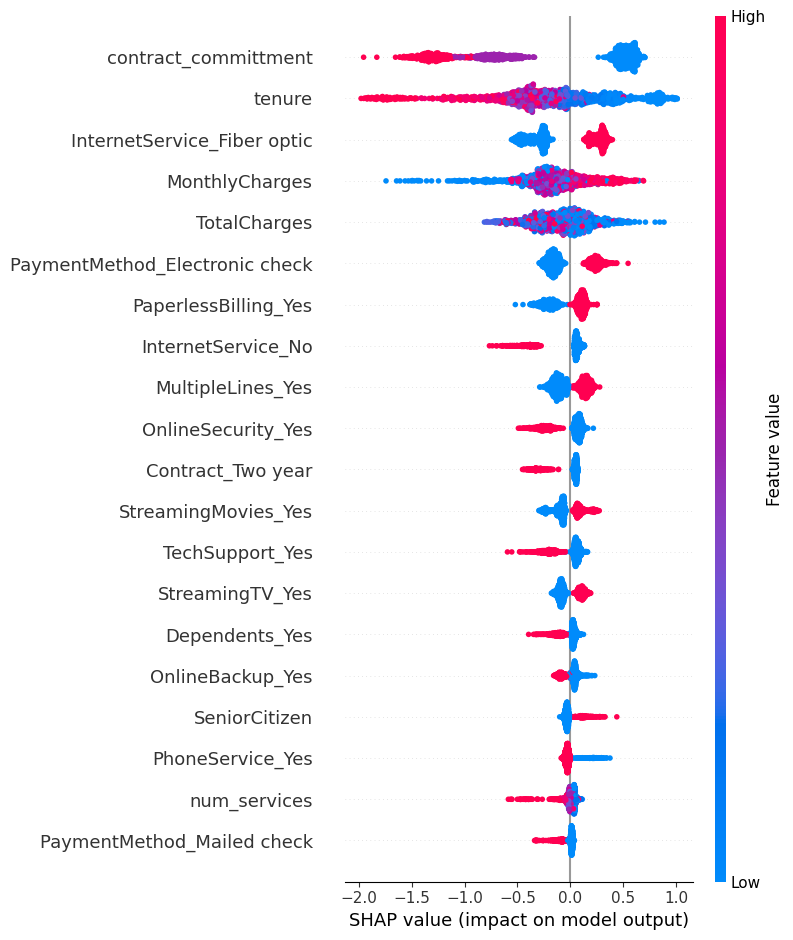

In [149]:
# Global explanation - feature importance plot 
# Shows top churn drivers, direction (red for high feature value and 
# blue for low feature value), and impact strength 
shap.summary_plot(shap_values, X_val_transformed, feature_names = feature_names)

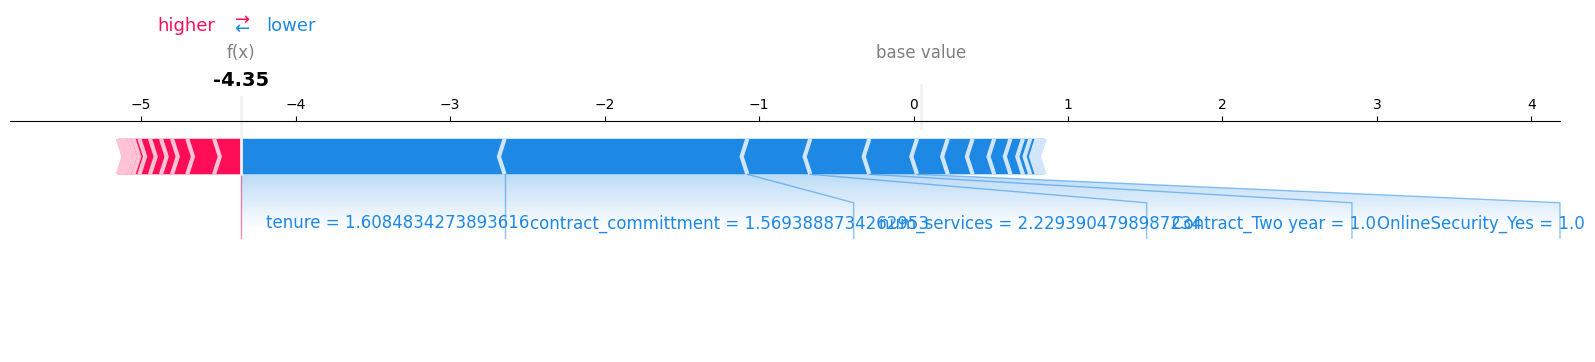

In [150]:
# Local explanation - one customer
# Picking 1 validation customer 
i = 0

# Shows which feature pushed churn up, which pushed it down, and 
# final probability construction 
shap.force_plot(
    explainer.expected_value,         # base churn probability (average model prediction = 26.5% in this case)
    shap_values[i],                   # contribution of EACH feature for customer i
    X_val_transformed[i],             # actual feature value for that customer; used only for labelling (so we see real values)
    feature_names = feature_names,    # so plot shows readable names instead of f0, f1, f2, ...
    matplotlib = True                 # for static plot inside Jupyter; without this, it tries to render interactive JS
)

# f(x) in the force_plot shows final prediction for this customer, 
# which, in this case, is -4.35 (very low churn probability)
# As per the graph, even though the red features (features pushing 
# towards churn) try to push churn, the blue ones (features pushing 
# towards non-churn) dominate, hence the final prediction is very low
# churn 

In [145]:
# If XGBoost is best, why use LogisticRegression or RandomForest at all

# Factor                Logistic            RF              XGBoost
# Interpretability      ⭐⭐⭐⭐⭐            ⭐⭐            ⭐
# Speed                 ⭐⭐⭐⭐⭐            ⭐⭐            ⭐
# Tuning effort         ⭐⭐⭐⭐⭐            ⭐⭐            ⭐
# Performance ceiling   ⭐⭐                 ⭐⭐⭐           ⭐⭐⭐⭐⭐
# Stability             ⭐⭐⭐⭐⭐            ⭐⭐⭐           ⭐⭐

# We always start with LogReg because 
# 1. It sets a baseline 
# 2. It validates data quality 
# 3. It gives business insight
# 4. It catches leakage and bugs 
# 5. It gives interpretability 

# We try RandomForest because it tells us 
# 1. Are there non-linear patterns?
# 2. Are interactions important?
# It's a diagnostic tool 

# We try XGBoost only after 
# 1. Data is clean
# 2. Features are good 
# 3. Baseline is strong 
# We ask "Can boosting extract extra performance"

In [151]:
# XGBOOST HYPERPARAMETER TUNING

# Until now, XGB model is almost default, that's why it didn't beat RF
# or LogReg. We will now compute correct scale_pos_weight, and tune the 
# parameters

In [152]:
# Computing correct scale_pos_weight
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

scale_pos_weight = neg / pos
scale_pos_weight

np.float64(2.768561872909699)

In [157]:
# Build a tuned XGBoost model (manual tuning)
xgb_tuned = XGBClassifier(
    n_estimators = 300, 
    max_depth = 4, 
    learning_rate = 0.05, 
    subsample = 0.8, 
    colsample_bytree = 0.8, 
    scale_pos_weight = scale_pos_weight, 
    objective = 'binary:logistic', 
    eval_metric = 'logloss', 
    random_state = 42
)

xgb_tuned_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor), 
    ('model', xgb_tuned)
])

xgb_tuned_pipeline.fit(X_train, y_train)

y_proba_xgb_tuned = xgb_tuned_pipeline.predict_proba(X_val)[:, 1]
y_pred_xgb_tuned = (y_proba_xgb_tuned >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_val, y_pred_xgb_tuned))
print("Precision:", precision_score(y_val, y_pred_xgb_tuned))
print("Recall:", recall_score(y_val, y_pred_xgb_tuned))
print("F1:", f1_score(y_val, y_pred_xgb_tuned))
print("ROC AUC:", roc_auc_score(y_val, y_proba_xgb_tuned))

Accuracy: 0.7565649396735273
Precision: 0.527927927927928
Recall: 0.7834224598930482
F1: 0.6307857911733046
ROC AUC: 0.8421245705133172


In [158]:
# After looking at the output metrics, we can deduce that this dataset 
# has strong linear signals, mostly monotonic relationships, and not 
# many complex interactions. This is why metrics of all the models 
# are almost the same and even tuned XGBoost did not beat others 

In [160]:
# Model                    Accuracy      Precision     Recall      F1 Score      ROC AUC
# Logistic Regression      0.7388        0.5051        0.8021      0.6198        0.8449
# Random Forest            0.7594        0.5310        0.8021      0.6390        0.8455
# XGBoost (Raw)            0.7566        0.5279        0.7834      0.6308        0.8421
# XGBoost (Tuned)          0.7566        0.5279        0.7834      0.6308        0.8421


# Random Forest gave slightly better F1 and ROC-AUC, but the 
# difference across models was marginal. Since logistic regression 
# provided comparable performance with much better interpretability, 
# we select it as the final model for deployment and business 
# decision-making.

In [162]:
# BUSINESS DECISION MAKING 

In [163]:
# Define Business Costs (assumptions)
# We assume the following 
# If a churner leaves, loss = - ₹ 5000
# If we wrongly target a loyal customer = - ₹ 500
# If we correctly retain a churner = + ₹ 5000
# If we correctly ignore loyal customers = ₹ 0

cost_false_negative = 5000       # False Negative: missed churner
cost_false_positive = 500        # False Positive: unnecessary retention offer

In [164]:
# Compute loss at different thresholds 
# We already have probabilities from logistic regression (best for business)

y_proba = pipeline.predict_proba(X_val)[:, 1]    # using logreg pipeline

In [169]:
thresholds = np.arange(0.1, 0.9, 0.05)

results = []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    # ravel() converts a multi-dimensional array into a 1D array
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_val, y_pred).ravel()
    total_cost = (false_negative * cost_false_negative) + (false_positive * cost_false_positive)
    results.append([t, false_positive, false_negative, total_cost])
    
cost_dataset = pd.DataFrame(results, columns = ["Threshold", "False Positives", "False Negatives", "Total Cost"])
cost_dataset

,Threshold,False Positives,False Negatives,Total Cost
0,0.10,718,4,379000
1,0.15,615,8,347500
2,0.20,563,14,351500
3,0.25,501,22,360500
4,0.30,455,28,367500
5,0.35,415,37,392500
6,0.40,370,46,415000
7,0.45,321,65,485500
8,0.50,294,74,517000
9,0.55,244,91,577000


In [166]:
# Find the best threshold (minimum cost)
cost_dataset.sort_values("Total Cost").head()

,Threshold,False Positives,False Negatives,Total Cost
1,0.15,615,8,347500
2,0.20,563,14,351500
3,0.25,501,22,360500
4,0.30,455,28,367500
0,0.10,718,4,379000


In [167]:
# Evaluate model at business optimal threshold
best_t = cost_dataset.loc[cost_dataset["Total Cost"].idxmin(), "Threshold"]

y_pred_best = (y_proba >= best_t).astype(int)

from sklearn.metrics import classification_report

print("Optimal Threshold: ", best_t)
print("Confusion Matrix \n", confusion_matrix(y_val, y_pred_best))
print("Classification Report \n", classification_report(y_val, y_pred_best))

Optimal Threshold:  0.15000000000000002
Confusion Matrix 
 [[420 615]
 [  8 366]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.41      0.57      1035
           1       0.37      0.98      0.54       374

    accuracy                           0.56      1409
   macro avg       0.68      0.69      0.56      1409
weighted avg       0.82      0.56      0.57      1409



In [168]:
# As can be seen above, instead of using the default 0.5 threshold, 
# we optimized the classification threshold based on business costs.
# By assigning higher cost to missed churners, we selected a threshold
# that minimized expected financial loss and improved churn capture
# significantly (as can be compared from the old and new confusion matrix)

In [170]:
# COST VS THRESHOLD CURVE (BUSINESS VISUALISATION)
# How business loss changes with threshold 

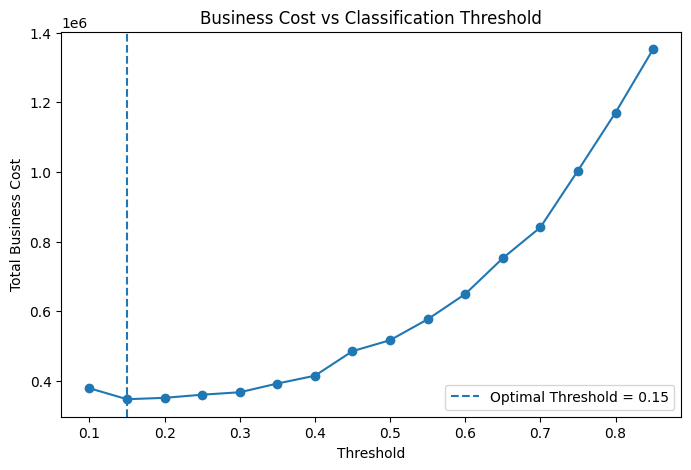

In [171]:
# Cost vs Threshold
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 5))
plt.plot(cost_dataset["Threshold"], cost_dataset["Total Cost"], marker = 'o')

plt.xlabel("Threshold")
plt.ylabel("Total Business Cost")
plt.title("Business Cost vs Classification Threshold")

plt.axvline(best_t, linestyle = '--', label = f"Optimal Threshold = {best_t:.2f}")
plt.legend()

plt.show()

In [172]:
# Compare Default (0.5) vs Business (best_t) Threshold 

# Default Threshold
y_pred_default = (y_proba >= 0.5).astype(int)
confusion_matrix_default = confusion_matrix(y_val, y_pred_default)

# Business Threshold
y_pred_business = (y_proba >= best_t).astype(int)
confusion_matrix_business = confusion_matrix(y_val, y_pred_business)

confusion_matrix_default, confusion_matrix_business

(array([[741, 294],
        [ 74, 300]]),
 array([[420, 615],
        [  8, 366]]))

In [174]:
# SEGMENT LEVEL CHURN ANALYSIS (BUSINESS INSIGHTS)

# Goal here, is to
# 1. Identify high-risk customer segments
# 2. Translate ML output into business strategy
# 3. Produce 4-6 strong insights we can talk about confidently

In [175]:
# Add predicted churn probability to validation data 

val_results = X_val.copy()
val_results["actual_churn"] = y_val.values
val_results["churn_proba"] = y_proba
val_results["predicted_churn"] = (y_proba >= best_t).astype(int)

In [176]:
# Create key business segments 

In [178]:
# Churn Rate by Contract Type
contract_churn = val_results.groupby("Contract")["actual_churn"].mean().sort_values(ascending = False)
contract_churn

Contract
Month-to-month    0.425614
One year          0.120000
Two year          0.026786
Name: actual_churn, dtype: float64

In [179]:
# Churn Rate by Tenure Group
tenure_churn = val_results.groupby("tenure_group")["actual_churn"].mean().sort_values(ascending = False)
tenure_churn

/var/folders/ts/m9lknbz137g0vy1jv1csn55c0000gn/T/ipykernel_5361/2923971292.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = val_results.groupby("tenure_group")["actual_churn"].mean().sort_values(ascending = False)


tenure_group
0-6      0.556270
7-12     0.304348
13-24    0.291262
25-48    0.210526
49-72    0.077778
Name: actual_churn, dtype: float64

In [180]:
# Churn Rate by Internet Service
internet_churn = val_results.groupby("InternetService")["actual_churn"].mean().sort_values(ascending = False)
internet_churn

InternetService
Fiber optic    0.411093
DSL            0.200413
No             0.080128
Name: actual_churn, dtype: float64

In [182]:
# Churn Rate by Monthly Charges bucket 
val_results["charge_bucket"] = pd.cut(
    val_results["MonthlyCharges"], 
    bins = [0, 35, 70, 120], 
    labels = ["Low", "Medium", "High"]
)

charge_churn = val_results.groupby("charge_bucket")["actual_churn"].mean()
charge_churn

/var/folders/ts/m9lknbz137g0vy1jv1csn55c0000gn/T/ipykernel_5361/1155045790.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charge_churn = val_results.groupby("charge_bucket")["actual_churn"].mean()


charge_bucket
Low       0.120344
Medium    0.243094
High      0.349570
Name: actual_churn, dtype: float64

In [183]:
# Identify TOP high-risk segments 

# From the tables generated above, we can deduce that 
# Month-to-Month Contracts -> highest churn
# Low tenure (0-12 months) -> very high churn
# Fiber Optic users -> high churn
# High Monthly Charges -> high churn

In [184]:
# Turn insights into action

# Based on the segments, we add actions like 
# 1. Offer discounts to month-to-month + new customers
# 2. Offer discounts to high charge fiber users
# 3. Push contract upgrades
# 4. Push auto-payment methods 

In [185]:
# FINAL MODEL AND THRESHOLD SELECTION

# For this Customer Churn project, the best choice of model is Logistic
# Regression, and the best threshold is 0.15, and not the default 0.5

# This is because 
# 1. LogReg had almost same performance as RandomForest or XGB
# 2. Best interpretability (coefficients + odds_ratios)
# 3. Easy to explain to business
# 4. Easy to deploy

# Although RandomForest gave slightly higher F1, LogisticRegression 
# achieved comparable ROC AUC with much better interpretability, so we
# select it as the final production model. We further optimised the 
# classification threshold based on business costs instead of using 
# the default 0.5

In [186]:
final_summary = pd.DataFrame({
    "Metric": ["Model", "Threshold", "ROC AUC", "F1", "Recall"], 
    "Value": [
        "Logistic Regression", 
        round(best_t, 2), 
        round(0.8449, 3), 
        round(0.6198, 3), 
        round(0.8021, 3)
    ]
})

final_summary

,Metric,Value
0,Model,Logistic Regression
1,Threshold,0.15
2,ROC AUC,0.845
3,F1,0.62
4,Recall,0.802
